In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)

locations = ['Highway 1', 'Highway 2', 'City Center', 'Urban Road', 'Industrial Zone', 'Rural Bypass']

entries = []
start_time = datetime.strptime('2025-07-01 00:00:00', '%Y-%m-%d %H:%M:%S')

for i in range(1000):
    location = random.choice(locations)

    speed = np.random.normal(loc=50, scale=15)
    vehicle_count = np.random.normal(loc=25, scale=10)

    speed = max(0, min(speed, 120))
    vehicle_count = max(0, int(vehicle_count))

    is_anomaly = 1 if speed < 10 or vehicle_count < 3 else 0

    timestamp = start_time + timedelta(minutes=i * 10)

    entries.append([location, round(speed, 2), vehicle_count, timestamp, is_anomaly])

df = pd.DataFrame(entries, columns=['location', 'speed', 'vehicle_count', 'timestamp', 'is_anomaly'])

df.to_csv("traffic_data.csv", index=False)
print("✅ traffic_data.csv with 1000 entries created.")

✅ traffic_data.csv with 1000 entries created.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   location       1000 non-null   object        
 1   speed          1000 non-null   float64       
 2   vehicle_count  1000 non-null   int64         
 3   timestamp      1000 non-null   datetime64[ns]
 4   is_anomaly     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 39.2+ KB
None
             speed  vehicle_count            timestamp  is_anomaly
count  1000.000000    1000.000000                 1000  1000.00000
mean     50.497860      25.080000  2025-07-04 11:15:00     0.01200
min       1.380000       0.000000  2025-07-01 00:00:00     0.00000
25%      40.827500      18.000000  2025-07-02 17:37:30     0.00000
50%      50.540000      25.000000  2025-07-04 11:15:00     0.00000
75%      59.727500      32.000000  2025-07-06 04:

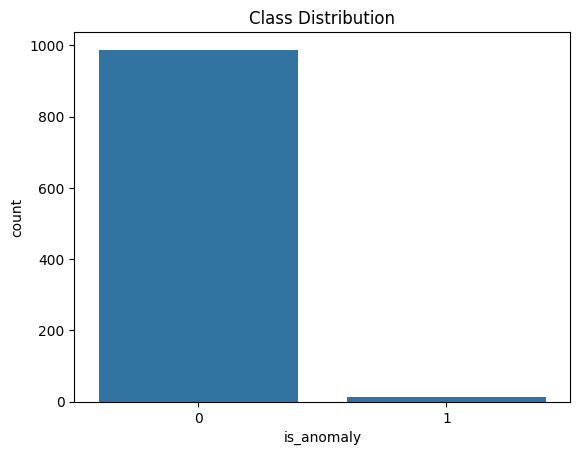

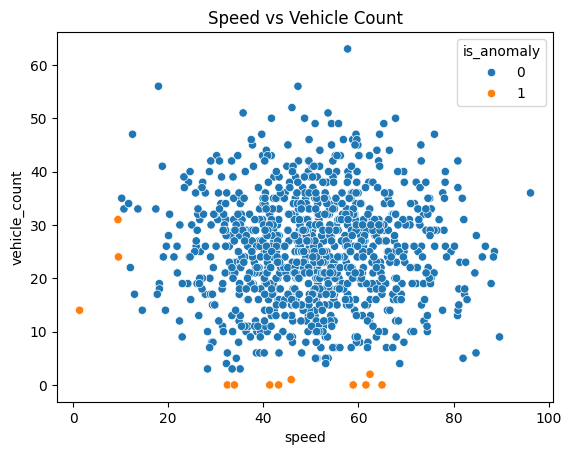

In [3]:
df = pd.read_csv("traffic_data.csv", parse_dates=["timestamp"])

print(df.info())
print(df.describe())

print("Null values:\n", df.isnull().sum())

print("\nClass Distribution:\n", df['is_anomaly'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_anomaly', data=df)
plt.title("Class Distribution")
plt.show()

sns.scatterplot(data=df, x='speed', y='vehicle_count', hue='is_anomaly')
plt.title("Speed vs Vehicle Count")
plt.show()

In [4]:
df_clean = df.drop(columns=['location', 'timestamp'])

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_clean[['speed', 'vehicle_count']] = scaler.fit_transform(df_clean[['speed', 'vehicle_count']])

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

X = df_clean.drop(columns=['is_anomaly'])
y = df_clean['is_anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       296
           1       1.00      1.00      1.00         4

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

✅ Accuracy: 1.0


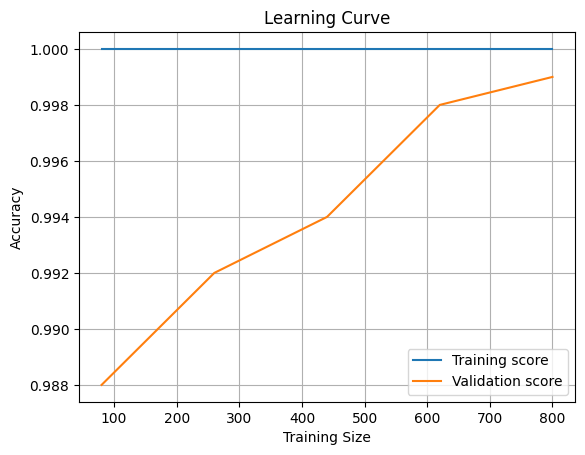

In [6]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [7]:
new_data = pd.DataFrame([
    {'location': 'Highway 3', 'speed': 15, 'vehicle_count': 3, 'timestamp': '2025-07-20 09:00:00', 'is_anomaly': 1},
    {'location': 'City Center', 'speed': 55, 'vehicle_count': 35, 'timestamp': '2025-07-20 09:15:00', 'is_anomaly': 0}
])

df_existing = pd.read_csv("traffic_data.csv", parse_dates=['timestamp'])
df_combined = pd.concat([df_existing, new_data], ignore_index=True)
df_combined.to_csv("traffic_data.csv", index=False)
print("✅ New entries added to CSV")

df = pd.read_csv("traffic_data.csv", parse_dates=["timestamp"])
df_clean = df.drop(columns=["location", "timestamp"])
df_clean[['speed', 'vehicle_count']] = scaler.fit_transform(df_clean[['speed', 'vehicle_count']])

X = df_clean.drop(columns=['is_anomaly'])
y = df_clean['is_anomaly']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

new_accuracy = accuracy_score(y_test, y_pred)
print("📊 Updated Accuracy:", new_accuracy)

✅ New entries added to CSV
📊 Updated Accuracy: 0.9933554817275747


In [9]:
sample_input = pd.DataFrame([[12, 1]], columns=['speed', 'vehicle_count'])

sample_input_scaled = scaler.transform(sample_input)

sample_input_scaled_df = pd.DataFrame(sample_input_scaled, columns=['speed', 'vehicle_count'])

prediction = model.predict(sample_input_scaled_df)

print("🚨 Anomaly Detected!" if prediction[0] == 1 else "✅ Normal Traffic")

🚨 Anomaly Detected!


In [11]:
normal_input = pd.DataFrame([[60, 30]], columns=['speed', 'vehicle_count'])

normal_input_scaled = scaler.transform(normal_input)

normal_input_scaled_df = pd.DataFrame(normal_input_scaled, columns=['speed', 'vehicle_count'])

normal_pred = model.predict(normal_input_scaled_df)

print("🚨 Anomaly Detected!" if normal_pred[0] == 1 else "✅ Normal Traffic")

✅ Normal Traffic
